<a href="https://colab.research.google.com/github/lezya/Deep-Learning/blob/master/Visualization_Of_Liner_Regression_Using_Tensor_Board.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instructions for updating:
non-resource variables are not supported in the long term


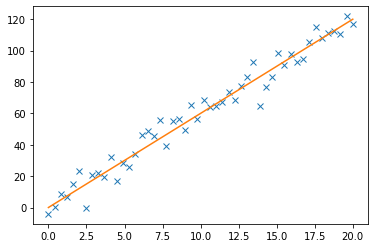

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 0.000000 Cost 9.083147 Weight 4.331773 Bias 0.408617
Epoch 40.000000 Cost 0.076639 Weight 5.966947 Bias 0.611761
Epoch 80.000000 Cost 0.075682 Weight 5.963221 Bias 0.668939
Epoch 120.000000 Cost 0.074822 Weight 5.959856 Bias 0.720573
Epoch 160.000000 Cost 0.074051 Weight 5.956818 Bias 0.767201
Epoch 200.000000 Cost 0.073357 Weight 5.954073 Bias 0.809310
Epoch 240.000000 Cost 0.072735 Weight 5.951597 Bias 0.847337
Epoch 280.000000 Cost 0.072172 Weight 5.949357 Bias 0.881677


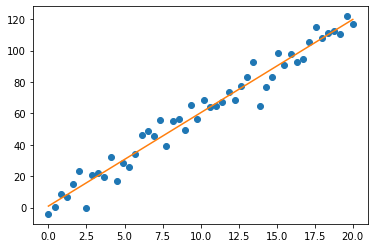

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

learning_parameter = 0.01
epochs=300
samples=50
x_train=np.linspace(0,20,samples)
y_train=6*x_train+7*np.random.randn(samples)
plt.plot(x_train,y_train,'x')
plt.plot(x_train,6*x_train)
plt.show()
Y=tf.placeholder(tf.float32)
X=tf.placeholder(tf.float32)
W=tf.Variable(np.random.randn(), name='Weights')
B=tf.Variable(np.random.randn(), name='Bias')
#Create the Model for regression
with tf.name_scope("Model") as scope:
  pred=X*W+B

#Add a summary to study behaviour of weights and biases with epochs
weight_histogram = tf.summary.histogram("Weights", W)
Bias_histogram = tf.summary.histogram("Bias", B)

#Cost Function
with tf.name_scope("cost_function") as scope:
  cost_iteration=tf.reduce_sum((pred-Y)**2/(2*samples))

#Record Cost Function Summary
cost_summary=tf.summary.scalar("Cost", cost_iteration)

#Define Optimizer
with tf.name_scope("Training") as scope:
  optimizer=tf.train.GradientDescentOptimizer(learning_parameter).minimize(cost_iteration)

#Initialize Variables
init=tf.global_variables_initializer() 

#merge all the summaries
merged_summary=tf.summary.merge_all()

#Define Tensorflow session
with tf.Session() as sess:
  sess.run(init)
  #Store all the files in Log folder
  writer = tf.summary.FileWriter('./log', sess.graph)
  for epoch in range (epochs):
    for x,y in zip(x_train,y_train):
      sess.run(optimizer, feed_dict={X:x,Y:y})
      #write logs to each epochs
      summary_epochs=sess.run(merged_summary, feed_dict={X:x,Y:y})
      writer.add_summary(summary_epochs,epoch)
    if not epoch % 40:
      W1=sess.run(W)
      B1=sess.run(B)
      cost_iter=sess.run(cost_iteration, feed_dict={X:x,Y:y})
      print('Epoch %f Cost %f Weight %f Bias %f' %(epoch, cost_iter, W1,B1))
  Weight=sess.run(W)
  Bias=sess.run(B)
plt.plot(x_train,y_train,'o')
plt.plot(x_train, Weight*x_train+Bias)
plt.show()